# Gather

- WeRateDogs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- tweet image predictions

In [4]:
import requests
from PIL import Image
from io import BytesIO

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
img = pd.read_csv(BytesIO(response.content),sep='\t')

In [7]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#save the data
img.to_csv('image_predictions.tsv',sep='\t',index=False)

- tweet's retweet count and favorite

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [10]:
data = []
with open('tweet_json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_api_data = pd.DataFrame.from_dict(data)

In [11]:
tweet_api_data = tweet_api_data[['id','favorite_count','retweet_count']]

In [12]:
#save the data
tweet_api_data.to_csv('tweet_api_data.csv',index=False)

# Assess Data

- twitter_data

In [13]:
twitter_data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
def missing_value(df):
    mis_val = df.isnull().sum()
    mis_val_precent = (df.isnull().sum() / len(df))*100
    mis_val_table = pd.concat([mis_val,mis_val_precent],axis=1).rename(columns={'0':'Missing Values', 1 : '% of Total Values'})
    return mis_val_table

In [16]:
missing_value(twitter_data)

,0,% of Total Values
tweet_id,0,0.000000
in_reply_to_status_id,2278,96.689304
in_reply_to_user_id,2278,96.689304
timestamp,0,0.000000
source,0,0.000000
text,0,0.000000
retweeted_status_id,2175,92.317487
retweeted_status_user_id,2175,92.317487
retweeted_status_timestamp,2175,92.317487
expanded_urls,59,2.504244


In [17]:
twitter_data.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Buddy         7
Daisy         7
an            7
Toby          7
Koda          6
Scout         6
Leo           6
Rusty         6
Oscar         6
Bella         6
Dave          6
Jax           6
Jack          6
Stanley       6
Milo          6
Oakley        5
           ... 
Storkson      1
Marty         1
Ester         1
Amélie        1
Trip          1
Dale          1
Pupcasso      1
Sailor        1
Chef          1
Jameson       1
Philippe      1
Rhino         1
Henry         1
Ronduh        1
Corey         1
Bruno         1
Rodney        1
Cermet        1
Norman        1
Ivar          1
Kial          1
Bloo          1
Margo         1
Jockson       1
Tango         1
Maya          1
his           1
Kuyu          1
Traviss       1
Leonidas      1
Name: name, Length: 957,

In [18]:
display(twitter_data.doggo.value_counts())
print('***********************************')
display(twitter_data.floofer.value_counts())
print('***********************************')
display(twitter_data.pupper.value_counts())
print('***********************************')
display(twitter_data.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

***********************************


None       2346
floofer      10
Name: floofer, dtype: int64

***********************************


None      2099
pupper     257
Name: pupper, dtype: int64

***********************************


None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
twitter_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [20]:
twitter_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1106,734787690684657664,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None
2044,671533943490011136,NaN,NaN,2015-12-01 03:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog here. Spiffy mohawk. Sharp mout...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671533943...,6,10,None,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2296,667090893657276420,NaN,NaN,2015-11-18 21:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None


- img

In [21]:
img.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
img.shape

(2075, 12)

In [24]:
img.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


- tweet_api_data

In [25]:
tweet_api_data.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [26]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [27]:
tweet_api_data.duplicated().sum()

0

In [28]:
tweet_api_data.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

# Quality
**twitter_data**
- tweet_id is int
- timestamp should be datetime not str
- in_reply_to_status_id should be str no float
- in_reply_to_user_id should be str no float
- retweeted_status_id should be str no float
- retweeted_status_timestamp should be datetime not str
- rating_denominator should be float
- in_reply_to_status_id:	2278 missing values	
- in_reply_to_user_id:	2278 missing values
- retweeted_status_id :	2175 missing values	
- retweeted_status_user_id : 2175 missing values
- retweeted_status_timestamp : 2175	missing values
- expanded_urls had a few misiing value
- name columns had some not accurate names like a ,an,the,None
- doggo, puppo, pupper and floofer have many values set as 'None'

**img**
- p1, p2, p3 inconsistent, it had some captial words and other small
- tweet_id is int

**tweet_api_data**
- id is int

# Tidiness
- doggo, puppo, pupper and floofer refer to the type of dog and should be in one type column
- twitter_data , img and tweet_api_data should be merged into one dataframe

# Clean 

**twitter_data**

In [29]:
#make a copy of the data
twitter_data_clean = twitter_data.copy()

In [30]:
twitter_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Quality

***Define***
- tweet_id , in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id  are int type and it should be str

**Code**

In [31]:
twitter_data_clean['tweet_id'] = twitter_data_clean['tweet_id'].astype('object')
twitter_data_clean['in_reply_to_status_id'] = twitter_data_clean['in_reply_to_status_id'].astype('object')
twitter_data_clean['in_reply_to_user_id'] = twitter_data_clean['in_reply_to_user_id'].astype('object')
twitter_data_clean['retweeted_status_id'] = twitter_data_clean['retweeted_status_id'].astype('object')

**Test**

In [32]:
twitter_data_clean['tweet_id'].dtype
twitter_data_clean['in_reply_to_status_id'].dtype
twitter_data_clean['in_reply_to_user_id'].dtype
twitter_data_clean['retweeted_status_id'].dtype

dtype('O')

***Define***
- timestamp ,retweeted_status_timestamp are object type and it should be datetime

**Code**

In [33]:
twitter_data_clean['timestamp'] = pd.to_datetime(twitter_data_clean['timestamp'])
twitter_data_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_data_clean['retweeted_status_timestamp'])

**Test**

In [34]:
twitter_data_clean['timestamp'].dtype
twitter_data_clean['retweeted_status_timestamp'].dtype

datetime64[ns, UTC]

***Define***
- rating_denominator should be float

**Code**

In [35]:
twitter_data_clean['rating_denominator'] = twitter_data_clean['rating_denominator'].astype('float')

**Test**

In [36]:
twitter_data_clean['rating_denominator'].dtype

dtype('float64')

***Define***
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp	had alot of missing value so we should drop it

**Code**

In [37]:
null_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

In [38]:
twitter_data_clean.drop(null_col,axis=1,inplace=True)

**Test**

In [39]:
assert [col not in twitter_data_clean.columns for col in null_col]

In [40]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
memory usage: 221.0+ KB


***Define***
- expanded_urls had a few misiing value, as tweet_id is the last part of the tweet URL after "status/" so we will make them

**Code**

In [41]:
def url(df):
    if df['expanded_urls'] == np.NAN:
        df['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(df['tweet_id'])
        return df
    else:
        return df

In [42]:
twitter_data_clean['expanded_urls'].fillna('https://twitter.com/dog_rates/status/{}'.format(twitter_data_clean['tweet_id']),inplace=True)

**Test**

In [43]:
assert twitter_data_clean['expanded_urls'].isnull().sum() == 0

***Define***
- name columns had some not accurate names like a ,an,the,None so we should replace it.

**Code**

In [44]:
twitter_data_clean['name'] = twitter_data_clean['name'].replace(['a','an','None','the'],np.NAN)

**Test**

In [45]:
assert [i not in twitter_data_clean['name'] for i in ['a','an','None','the']]

In [46]:
twitter_data_clean['name'].value_counts().head(10)

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Lola       10
Tucker     10
Penny      10
Bo          9
Winston     9
Sadie       8
Name: name, dtype: int64

- img


In [47]:
#make a copy of the data
img_clean = img.copy()

In [48]:
img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


***Define***
- tweet_id is int type and it should be str

**Code**

In [49]:
img_clean['tweet_id'] = img_clean['tweet_id'].astype('object')

**Test**

In [50]:
img_clean['tweet_id'].dtype

dtype('O')

***Define***
- p1, p2, p3 inconsistent, it had some captial words and other small 

**Code**

In [51]:
img_clean.p1 = img_clean.p1.str.lower()
img_clean.p2 = img_clean.p2.str.lower()
img_clean.p3 = img_clean.p3.str.lower()

**Test**

In [52]:
assert img_clean.p1.str.islower().any()
assert img_clean.p2.str.islower().any()
assert img_clean.p3.str.islower().any()

- tweet_api_data

In [53]:
#make a copy of the data
tweet_api_data_clean = tweet_api_data.copy()

***Define***
- id is int type and it should be str

**Code**

In [54]:
tweet_api_data_clean['id'] = tweet_api_data_clean['id'].astype('object')

**Test**

In [55]:
tweet_api_data_clean['id'].dtype

dtype('O')

## Tidiness


***Define***
- doggo, puppo, pupper and floofer refer to the type of dog and should be in one type column

**Code**

In [56]:
# check where there are more than one type of dogs for one dog entry
dog_stage = ['puppo', 'doggo', 'pupper', 'floofer']
twitter_data_clean[(twitter_data_clean[dog_stage] != 'None').sum(axis=1) > 1][dog_stage]

,puppo,doggo,pupper,floofer
191,puppo,doggo,None,None
200,None,doggo,None,floofer
460,None,doggo,pupper,None
531,None,doggo,pupper,None
565,None,doggo,pupper,None
575,None,doggo,pupper,None
705,None,doggo,pupper,None
733,None,doggo,pupper,None
778,None,doggo,pupper,None
822,None,doggo,pupper,None


In [57]:
# assign Nan to all of the values that are invalid
labels = twitter_data_clean[(twitter_data_clean[dog_stage] != 'None').sum(axis=1) > 1].index

for t in dog_stage:
    twitter_data_clean.loc[labels, t] = np.nan

In [58]:
# create a stage column and assign the values to it
twitter_data_clean[dog_stage] = twitter_data_clean[dog_stage].replace('None', np.nan)

twitter_data_clean['stage'] = twitter_data_clean['doggo'].fillna(twitter_data_clean['floofer'])
twitter_data_clean['stage'] = twitter_data_clean['stage'].fillna(twitter_data_clean['pupper'])
twitter_data_clean['stage'] = twitter_data_clean['stage'].fillna(twitter_data_clean['puppo'])

twitter_data_clean['stage'] = twitter_data_clean['stage'].fillna('None')

In [59]:
# drop the other columns
twitter_data_clean = twitter_data_clean.drop(columns=dog_stage)

**Test**

In [60]:
twitter_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None


***Define***
- twitter_data and img,tweet_api_data should be one dataframe so we will merge them

**Code**

In [61]:
df = pd.merge(twitter_data_clean,img_clean,how='left', on=['tweet_id'])

In [62]:
df = pd.merge(df,tweet_api_data_clean,how='left', left_on='tweet_id',
    right_on='id')
df.drop('id',axis=1,inplace=True)

**Test**

In [63]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,41048.0,9774.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null float64
name                  1541 non-null object
stage                 2356 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
favorite_count  

# Store The Data

In [65]:
df.to_csv('Twitter Data.csv',index=False)

# Analyze and Visualizie

- **plot the number of tweet data per month.**

C:\Users\omar mohamed\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


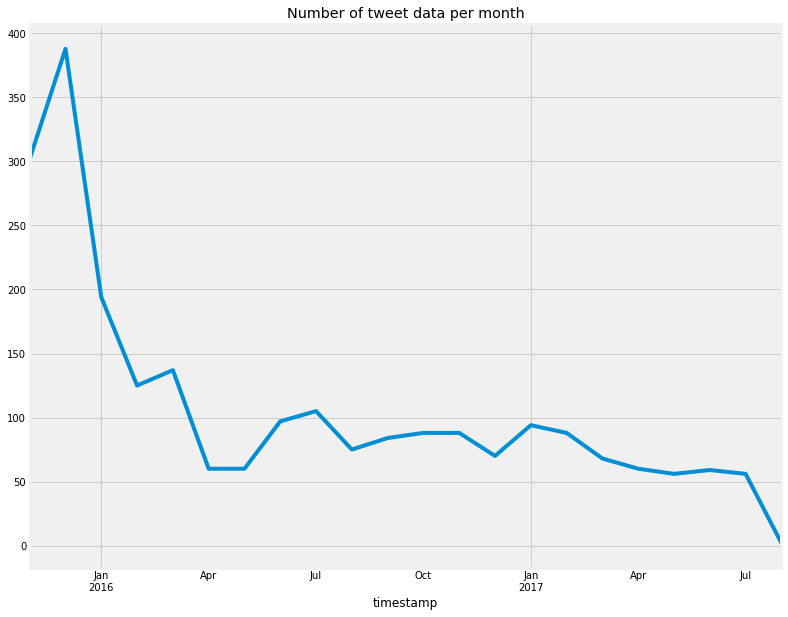

In [66]:
plt.figure(figsize=(12,10))
df.groupby(df['timestamp'].dt.to_period("M")).count()['tweet_id'].plot()
plt.title('Number of tweet data per month')
plt.show()

- **Plot Dogs top names.**

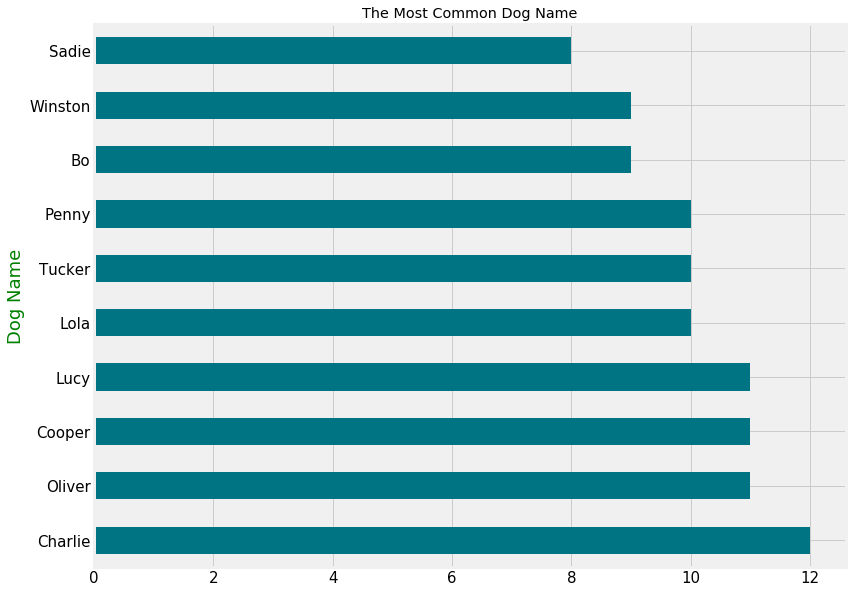

In [67]:
g = df.name.value_counts()[:10]

#initializing plot
ax = g.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Dog Name')

#x-label
ax.set_ylabel('Dog Name', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

- **retweet count and the favorite count per month**

C:\Users\omar mohamed\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\omar mohamed\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


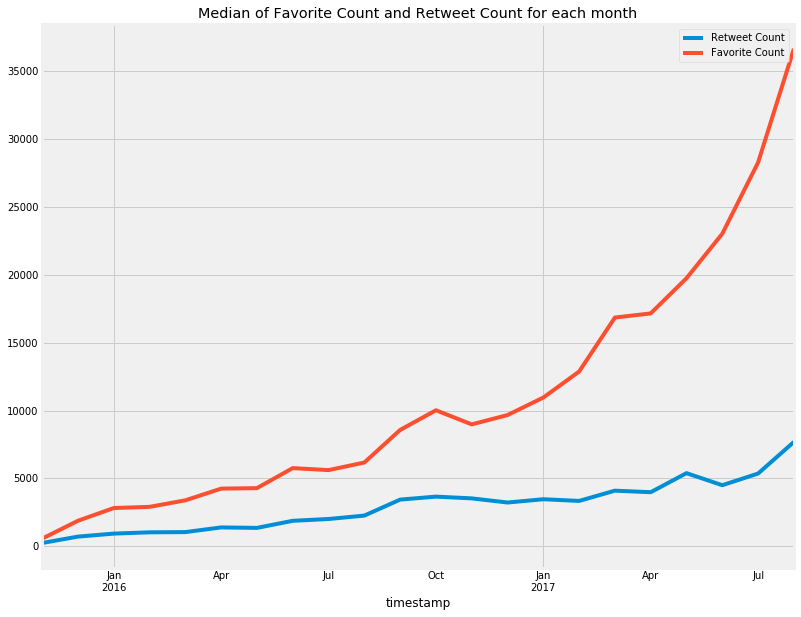

In [68]:
plt.figure(figsize=(12,10))
df.groupby(df['timestamp'].dt.to_period("M")).median()['retweet_count'].plot(label='Retweet Count')
df.groupby(df['timestamp'].dt.to_period("M")).median()['favorite_count'].plot(label='Favorite Count')
plt.legend()
plt.title('Median of Favorite Count and Retweet Count for each month')
plt.show()

- **The relation between retweet count and favorite count**

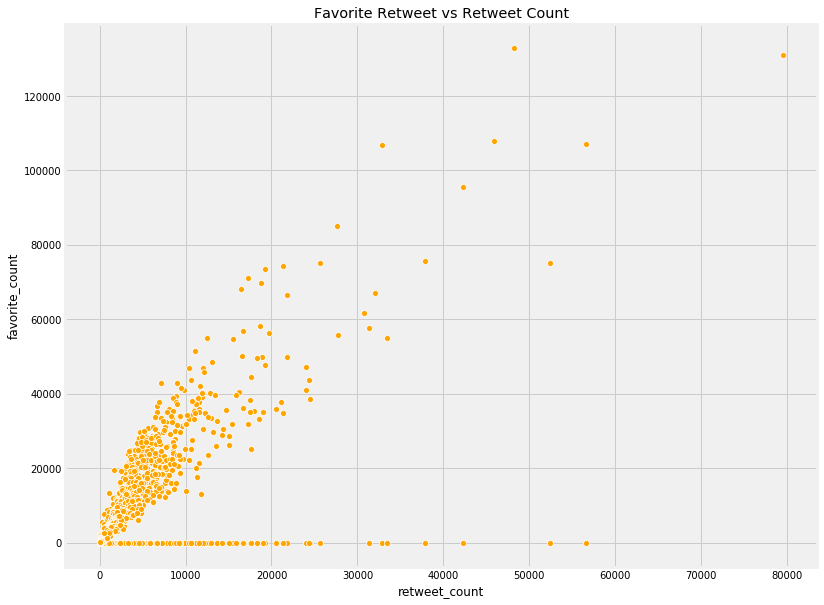

In [69]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='retweet_count', y='favorite_count', data=df,color='orange')
plt.title('Favorite Retweet vs Retweet Count')
plt.show()